In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))


The topic this week is clustering but we also visit the issue of dealing with null (NaN) values in 
data and using pivot tables to transform data in Pandas. 

This example is taken from the end of Chapter 7 in the text with some minor variation.  The example 
in the book contains a few more details that you may want to follow up on.  The data comes from Eurostat
and describes the expenditure of some countries on education.

Eurostat is the home of the [European Commission data](http://ec.europa.eu/eurostat). Eurostat’s main role is to process and publish comparable statistical information at European level. Data in Eurostat is provided by each member state. Eurostat's re-use policy is free re-use of its data, both for non-commercial and commercial purposes (with some minor exceptions).

In [2]:
# Read and check the dataset downloaded from the EuroStat

edu=pd.read_csv('./files/educ_figdp_1_Data.csv',na_values=':')
edu.head()

TIME                            GEO  \
0  2002  European Union (27 countries)   
1  2002  European Union (27 countries)   
2  2002  European Union (27 countries)   
3  2002  European Union (27 countries)   
4  2002  European Union (27 countries)   

                                            INDIC_ED  Value  
0  Total public expenditure on education as % of ...   5.10  
1  Total public expenditure on education as % of ...   1.14  
2  Total public expenditure on education as % of ...   2.32  
3  Total public expenditure on education as % of ...   1.15  
4  Total public expenditure on education as % of ...   0.50

In [3]:
edu.tail()

TIME    GEO                                           INDIC_ED  Value
4915  2011  Japan  Total public expenditure on education as % of ...    NaN
4916  2011  Japan  Expenditure on educational institutions from p...    NaN
4917  2011  Japan  Public subsidies to the private sector as % of...    NaN
4918  2011  Japan  Expenditure on educational institutions from p...   1.56
4919  2011  Japan  Total public expenditure on education as % of ...   3.67

Data in CSV and databases are often organized in what is called **stacked** or **record** formats. In our case for each year (`TIME`) and country (`GEO`) of the EU as well as some reference countries such as Japan and United States, we have twelve indicators (`INDIC_ED`) on education finance with their values (`Value`). Let us reshape the table into a feature vector style data set. 

To the process of reshaping stacked data into a table is sometimes called **pivoting**.  Read about it [here in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reshaping.html).

In [4]:
#Pivot table in order to get a nice feature vector representation with dual indexing by TIME and GEO 
pivedu=pd.pivot_table(edu, values='Value', index=['TIME', 'GEO'], columns=['INDIC_ED'])
pivedu.head()

INDIC_ED       Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                                        
2002 Albania                                                 NaN                                                                
     Austria                                                0.38                                                                
     Belgium                                                0.36                                                                
     Bulgaria                                               0.67                                                                
     Croatia                                                0.13                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined  \
TIME GEO                                                                                                                        
2002 Albania                                                 NaN                                                                
     Austria                                                5.30                                                                
     Belgium                                                5.80                                                                
     Bulgaria                                               3.75                                                                
     Croatia                                                3.71                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                                            
2002 Albania                                                 NaN                                                                                    
     Austria                                               10.46                                                                                    
     Belgium                                               11.65                                                                                    
     Bulgaria                                               9.49                                                                                    
     Croatia                                                 NaN                                                                                    

INDIC_ED       Public subsidies to the private sector as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                  
2002 Albania                                                 NaN                                          
     Austria                                                0.37                                          
     Belgium                                                0.29                                          
     Bulgaria                                               0.18                                          
     Croatia                                                 NaN                                          

INDIC_ED       Public subsidies to the private sector as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                       
2002 Albania                                                 NaN                                                               
     Austria  

In [6]:
print('Let us check the two indices:\n')
print('\nPrimary index (TIME): \n' + str(pivedu.index.levels[0].tolist()))
print('\nSecondary index (GEO): \n' + str(pivedu.index.levels[1].tolist()))

Let us check the two indices:


Primary index (TIME): 
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Secondary index (GEO): 
['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Observe that we have ten years information on these indicators, and as expected we have all members of the European Union with some aggregates and control/reference countries. For the sake of simplicity, let us focus on values on year 2010.

In [7]:
#Extract 2010 set of values
edu2010=pivedu.ix[2010]
edu2010

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


INDIC_ED                                          Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined  \
GEO                                                                                                                                                                
Albania                                                                                         NaN                                                                
Austria                                                                                        0.52                                                                
Belgium                                                                                        0.34                                                                
Bulgaria                                                                                       0.63                                                                
Croatia                                                                                        0.26                                                                
Cyprus                                                                                         1.61                                                                
Czech Republic                                                                                 0.57                                                                
Denmark                                                                                        0.44                                                                
Estonia                                                                                        0.41                                                                
Euro area (13 countries)                                                                       0.61                                                                
Euro area (15 countries)                                                                       0.61                                                                
European Union (25 countries)                                                                  0.85                                                                
European Union (27 countries)                                                                  0.82                                                                
Finland                                                                                        0.15                                                                
Former Yugoslav Republic of Macedonia, the                                                      NaN                                                                
France                                                                                         0.64                                                                
Germany (until 1990 former territory of the FRG)                                               0.74                                                                
Greece                                                                                          NaN                                                                
Hungary                                                                                         NaN                                                                
Iceland                                                                                        0.75                                                                
Ireland                                                                                        0.48                                                                
Italy                                                                                          0.46                                                                
Japan                                                           

In [8]:
# Replace some of the country names to make them more readable on our plots
edu2010 = edu2010.rename(index={'Euro area (13 countries)': 'EU13',
                                'Euro area (15 countries)': 'EU15',
                                'European Union (25 countries)': 'EU25',
                                'European Union (27 countries)': 'EU27',
                                'Former Yugoslav Republic of Macedonia, the': 'Macedonia',
                                'Germany (until 1990 former territory of the FRG)': 'Germany'
                        })

# Store column names and clear them to make tables easier to read
features = edu2010.columns.tolist()
countries = edu2010.index.tolist()

# set column names to simple integers
edu2010.columns=range(12)
edu2010.head()

0     1      2     3     4     5     6     7     8     9     10  \
GEO                                                                           
Albania    NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Austria   0.52  5.25   9.98  0.64  1.22  0.61  1.01  2.64  1.63  5.89  5.90   
Belgium   0.34  6.25  11.90  0.32  0.61  0.78  1.54  2.79  1.46  6.57  6.44   
Bulgaria  0.63  3.35   8.96  0.74  1.99  0.92  0.80  1.76  0.61  4.10  4.18   
Croatia   0.26  4.24    NaN  0.03   NaN  0.65  1.87  0.97  0.78  4.27  4.42   

             11  
GEO              
Albania     NaN  
Austria   11.20  
Belgium   12.51  
Bulgaria  10.95  
Croatia     NaN

As we can observe, this is not a clean data set, there are missing values. Some countries may not collect or have access to some indicators and there are countries without any indicators. Let us display this effect.

Counts of NaN values [12  0  0  0  3  0  0  0  0  0  0  0  0  0 12  0  0 12  1  0  0  0  3  0  6
  0  9  0  0  0  0  0  0  0  0  0  0  0  9  0  3]


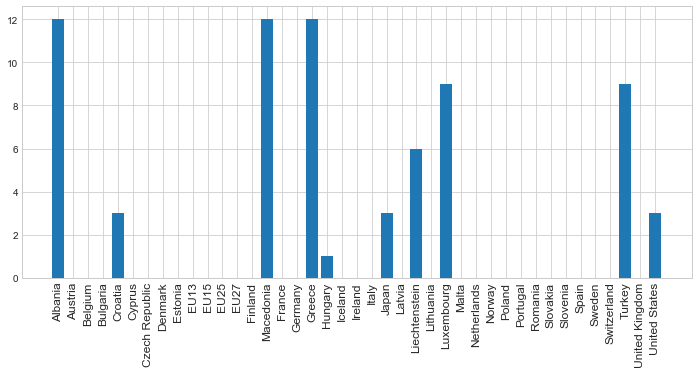

In [9]:
#Check what is going on in the NaN data 
# Count how many NaN values for each country in the dataframe 
nan_countries=np.sum(np.where(edu2010.isnull(),1,0),axis=1)
print("Counts of NaN values", nan_countries)

# plot these in a bar graph
plt.bar(np.arange(nan_countries.shape[0]),nan_countries)
plt.xticks(np.arange(nan_countries.shape[0]),countries,rotation=90,horizontalalignment='center',
           fontsize=12)
fig = plt.gcf()
fig.set_size_inches((12,5))

We don't have info on Albania, Macedonia and Greece. And very limited info from Liechtenstein, Luxembourg and Turkey. So let us work without them. Now let us check the features.

In [10]:
# Remove countries where more than four values are missing 
wrk_countries = nan_countries<4
print("Countries to keep:", wrk_countries)
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
print("Country names", wrk_countries_names)

educlean=edu2010.ix[wrk_countries] #.ix - Construct an open mesh from multiple sequences.

educlean.head()

Countries to keep: [False  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
 False  True False  True  True  True  True  True  True  True  True  True
  True  True False  True  True]
Country names ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'Finland', 'France', 'Germany', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']


C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


0     1      2     3     4     5     6     7     8     9     10  \
GEO                                                                           
Austria   0.52  5.25   9.98  0.64  1.22  0.61  1.01  2.64  1.63  5.89  5.90   
Belgium   0.34  6.25  11.90  0.32  0.61  0.78  1.54  2.79  1.46  6.57  6.44   
Bulgaria  0.63  3.35   8.96  0.74  1.99  0.92  0.80  1.76  0.61  4.10  4.18   
Croatia   0.26  4.24    NaN  0.03   NaN  0.65  1.87  0.97  0.78  4.27  4.42   
Cyprus    1.61  6.73  14.59  1.19  2.57  0.40  2.26  3.14  2.12  7.92  8.18   

             11  
GEO              
Austria   11.20  
Belgium   12.51  
Bulgaria  10.95  
Croatia     NaN  
Cyprus    17.16

There are still NaN values in the data in some places, we have two options, we can drop the rows with NaN values or fill these values in.  If we fill them in we would use the average of that feature for other countries. 

The text has examples of both of these, we will choose to fill in the values here.

In [11]:
edufill=educlean.fillna(educlean.mean())
print('Filled in data shape: ' + str(edufill.shape))
edufill.head()

Filled in data shape: (35, 12)


0     1          2     3         4     5     6     7     8     9   \
GEO                                                                             
Austria   0.52  5.25   9.980000  0.64  1.220000  0.61  1.01  2.64  1.63  5.89   
Belgium   0.34  6.25  11.900000  0.32  0.610000  0.78  1.54  2.79  1.46  6.57   
Bulgaria  0.63  3.35   8.960000  0.74  1.990000  0.92  0.80  1.76  0.61  4.10   
Croatia   0.26  4.24  10.814687  0.03  1.110937  0.65  1.87  0.97  0.78  4.27   
Cyprus    1.61  6.73  14.590000  1.19  2.570000  0.40  2.26  3.14  2.12  7.92   

            10         11  
GEO                        
Austria   5.90  11.200000  
Belgium   6.44  12.510000  
Bulgaria  4.18  10.950000  
Croatia   4.42  11.929063  
Cyprus    8.18  17.160000

Note the value in column 2 for Croatia which was NaN before.

Let's look at the distribution of the data we have ended up with.

In [12]:
edufill.describe()

0          1          2          3          4          5   \
count  35.000000  35.000000  35.000000  35.000000  35.000000  35.000000   
mean    0.723824   5.126857  10.814687   0.512000   1.110937   0.591714   
std     0.493231   0.965657   1.753591   0.391008   0.768893   0.234890   
min     0.100000   3.350000   8.320000   0.030000   0.300000   0.100000   
25%     0.450000   4.555000   9.685000   0.270000   0.610000   0.460000   
50%     0.630000   5.080000  10.340000   0.350000   0.870000   0.550000   
75%     0.810000   5.650000  11.895000   0.620000   1.210000   0.685000   
max     2.250000   7.510000  15.030000   1.840000   3.600000   1.270000   

              6          7          8          9          10         11  
count  35.000000  35.000000  35.000000  35.000000  35.000000  35.000000  
mean    1.399143   2.309143   1.331143   5.630571   5.752857  11.929063  
std     0.467675   0.507139   0.433724   1.172059   1.301080   2.060367  
min     0.580000   0.970000   0.610000   3.530000   3.570000   8.790000  
25%     1.110000   1.980000   1.010000   4.995000   4.955000  10.600000  
50%     1.400000   2.390000   1.290000   5.480000   5.480000  11.380000  
75%     1.660000   2.600000   1.500000   6.315000   6.295000  12.600000  
max     2.460000   3.250000   2.410000   8.800000   9.220000  17.160000

Note the difference in the mean and standard deviation of the variables - some are very high and some are tiny.  This suggests that standardisation (normalisation) would be a good idea to prevent one variable dominating in our analysis. 

In the text, they use the sklearn StandardScaler to do this, that's ok but we'll stick with Pandas and do the 
normalisation explicitly by subtracting the mean and dividing by the standard deviation.  

In [24]:
edustd = (edufill - edufill.mean())/edufill.std()

# take a look at the data with head and describe to verify how it has changed

Here is the code to run kmeans clustering on the original (non-standardised) data.  

In [14]:
clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=42)
clf.fit(edufill)

labels = clf.predict(edufill)

# Show the names of the countries in each cluster
# 
print('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(labels) if item==0]))
print( '\n')
print( 'Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(labels) if item==1]))
print( '\n')
print('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(labels) if item==2]))
print( '\n')


Cluster 0: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Germany', 'Hungary', 'Italy', 'Japan', 'Romania', 'Slovakia']


Cluster 1: 
['Cyprus', 'Denmark', 'Estonia', 'Iceland', 'Malta', 'Norway', 'Sweden', 'Switzerland']


Cluster 2: 
['Austria', 'Belgium', 'EU13', 'EU15', 'EU25', 'EU27', 'Finland', 'France', 'Ireland', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'United Kingdom', 'United States']




0 Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined
1 Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined
2 Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined
3 Public subsidies to the private sector as % of GDP, for all levels of education combined
4 Public subsidies to the private sector as % of total public expenditure, for all levels of education combined
5 Total public expenditure on education as % of GDP, at pre-primary level of education (ISCED 0) and not allocated by level
6 Total public expenditure on education as % of GDP, at primary level of education (ISCED 1)
7 Total public expenditure on education as % of GDP, at secondary level of education (ISCED 2-4)
8 Total public expenditure on education as % of GDP, at tertiary level of education (ISCED 5-6)
9 Total public expenditure o

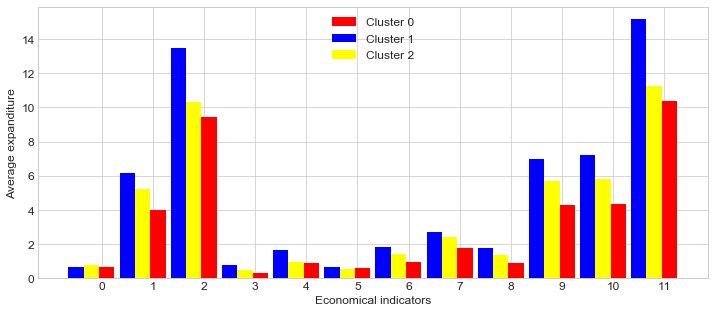

In [15]:
## generate a plot showing the average values on each variable for each cluster
## to allow us to see how the clusters differ
width=0.3
p1 = plt.bar(np.arange(12), clf.cluster_centers_[1], width, color='b')
        # Scale back the data to the original representation
p2 = plt.bar(np.arange(12)+width, clf.cluster_centers_[2], width, color='yellow')
p0 = plt.bar(np.arange(12)+2*width, clf.cluster_centers_[0], width, color='r')

plt.legend( (p0[0], p1[0], p2[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2') ,loc=9)
plt.xticks(np.arange(12) + 0.5, np.arange(12), size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicators')
plt.ylabel('Average expanditure')
fig = plt.gcf()
# print the feature names to remind us what they are
for f in range(len(features)):
    print(f, features[f])

This gives us one clustering with KMeans, an alternative clustering method is [hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) where we don't have to decide how many clusters there should be.   Hierarchical clustering can be bottom up or top down.   The scipy linkage function 
performs bottom up or agglomerative clustering.  The results can be displayed in a **dendogram** that shows how the clusters are put together. 

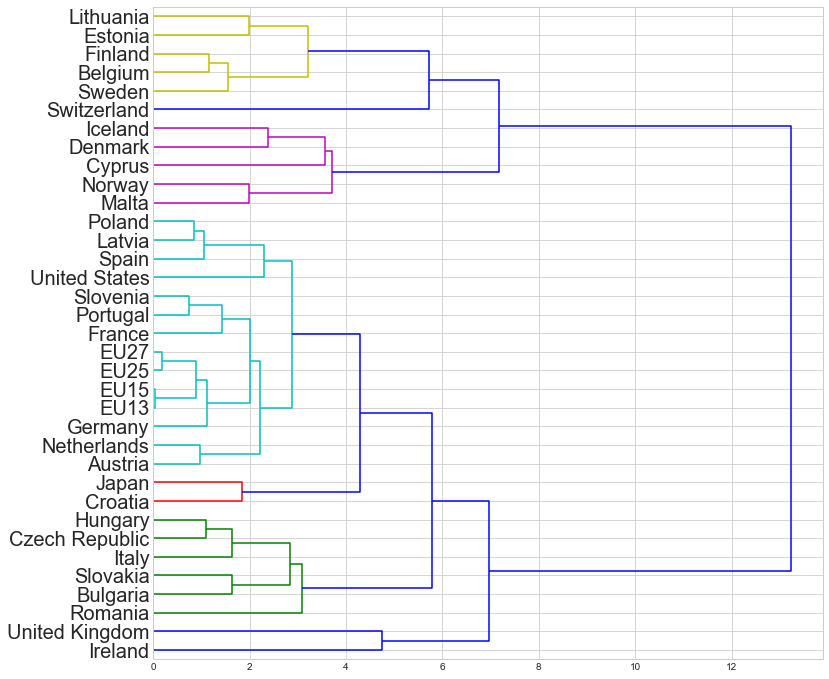

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

X_train = edufill.values
dist = pdist(X_train,'euclidean')
linkage_matrix = linkage(dist,method = 'complete');
plt.figure()  # we need a tall figure
fig = plt.gcf()
fig.set_size_inches((12,12))
dendrogram(linkage_matrix, orientation="right", color_threshold = 4,
           labels = wrk_countries_names, leaf_font_size=20);

plt.show()

How does the clustering created here compare with the result of KMeans clustering? 

Repeat the above two analyses using the standardised version of the data (**edustd**).  Are the clusters the same that you get out of this.  Are they *better* in any sense?

**Checkpoint** show the comparison of the KMeans clustering for the standardised and non-standardised data.

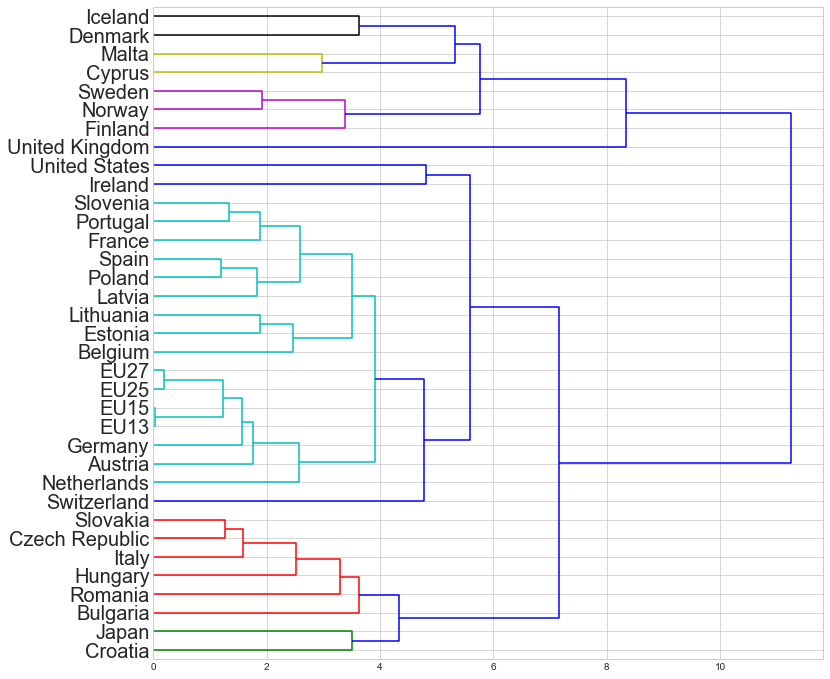

In [25]:
# repeat the analyses here
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

X_train = edustd.values
dist = pdist(X_train,'euclidean')
linkage_matrix = linkage(dist,method = 'complete');
plt.figure()  # we need a tall figure
fig = plt.gcf()
fig.set_size_inches((12,12))
dendrogram(linkage_matrix, orientation="right", color_threshold = 4,
           labels = wrk_countries_names, leaf_font_size=20);

plt.show()


In [23]:
clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=42)
clf.fit(edustd)

labels = clf.predict(edustd)

# Show the names of the countries in each cluster
# 
print('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(labels) if item==0]))
print( '\n')
print( 'Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(labels) if item==1]))
print( '\n')
print('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(labels) if item==2]))
print( '\n')


Cluster 0: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']


Cluster 1: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']


Cluster 2: 
['Cyprus', 'Denmark', 'Iceland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']




0 Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined
1 Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined
2 Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined
3 Public subsidies to the private sector as % of GDP, for all levels of education combined
4 Public subsidies to the private sector as % of total public expenditure, for all levels of education combined
5 Total public expenditure on education as % of GDP, at pre-primary level of education (ISCED 0) and not allocated by level
6 Total public expenditure on education as % of GDP, at primary level of education (ISCED 1)
7 Total public expenditure on education as % of GDP, at secondary level of education (ISCED 2-4)
8 Total public expenditure on education as % of GDP, at tertiary level of education (ISCED 5-6)
9 Total public expenditure o

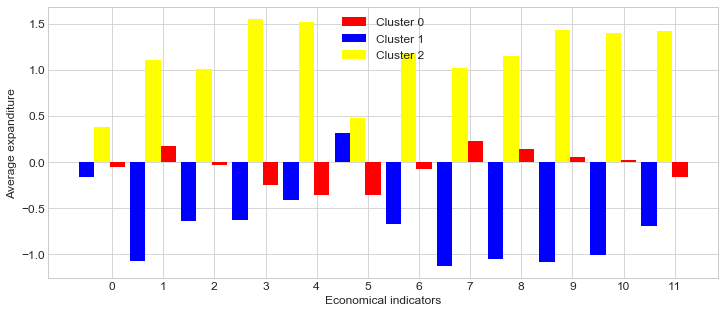

In [26]:
## generate a plot showing the average values on each variable for each cluster
## to allow us to see how the clusters differ
width=0.3
p1 = plt.bar(np.arange(12), clf.cluster_centers_[1], width, color='b')
        # Scale back the data to the original representation
p2 = plt.bar(np.arange(12)+width, clf.cluster_centers_[2], width, color='yellow')
p0 = plt.bar(np.arange(12)+2*width, clf.cluster_centers_[0], width, color='r')

plt.legend( (p0[0], p1[0], p2[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2') ,loc=9)
plt.xticks(np.arange(12) + 0.5, np.arange(12), size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicators')
plt.ylabel('Average expanditure')
fig = plt.gcf()
# print the feature names to remind us what they are
for f in range(len(features)):
    print(f, features[f])

Describe your results here...